<h2>Dẫn nhập</h2>

Động lực của p-values là như thế này. Cho trước một giả thuyết (null hypothesis) liên quan đến dữ liệu của chúng ta (ví dụ giá trị mean). Giá trị mẫu mà ta thu được nhấn mạnh dữ liệu quan sát được như thế nào? Kiểm định thống kê của chúng ta có đồng nhất hay không với giả thuyết ban đầu? Như vậy, một cách không tường minh, ta có ba bước để trả lời những câu hỏi này.

<strong>Bước đầu tiên đó là đặt giả thuyết (null hypothesis): </strong>Chúng ta phải bắt đầu với một giả thuyết, là một lý luận dự đoán phân bố từ dữ liệu tổng hợp (data summary). Nhắc lại, khi ta có giả thuyết $ H_0$, ta sẽ đo lường giả thuyết nghịch $ H_a$ bằng cách sử dụng dữ liệu quan sát (observered data).

<strong>Bước tiếp theo tính giá trị kiểm định (test statistic): </strong>Ta cần một vài số liệu để đối sánh với giá trị mà ta đã đặt ra ở $ H_0$.

<strong>Bước cuối cùng là so sánh giá trị kiểm định với phân bố của giả thuyết:</strong> Việc đối sánh này sẽ cho ta biết giá trị kiểm định có ý nghĩa bao nhiêu đối với giả thuyết nghịch $ H_a$.
<h2>Trị số p (p-values)</h2>

Trị số p (p-values) là một con số xác suất, tức là viết tắt chữ "probability values", cho biết giá trị kiểm định của chúng ta có đủ bằng chứng để kết luận chấp nhận hay bác bỏ giả thuyết (null hypothesis) ban đầu hay không.

Ta hãy khảo sát ví dụ sau. Giả sử ta thu được thống kê t là 2.5 với bậc tự do là 15 cho kiểm định $ H_0 (\mu=\mu_0)$ và $ H_a (\mu > \mu_0)$. Ta muốn tìm xác suất để đạt đến giá trị 2.5 này là bao nhiêu.

R hỗ trợ ta việc này. Ta có thể sử dụng hàm pt() trong R, là hàm phân bố t. Hàm này trả về một trong hai giá trị xác suất, hoặc là xác suất $X > q$ (nếu lower.tail sai) hay $X \le q$ (nếu lower.tail đúng). Trong đó, $q$ là phân vị. Ta đặt phân vị $q=2.5$, bậc tự do df=15, lower.tail=FALSE vì $ H_a$ bảo rằng $ \mu > \mu_0$. Ta phải đánh giá trị số này theo $ H_a$.


In [1]:
library("ggplot2")
library("repr")
options(repr.plot.width=4, repr.plot.height=4)

In [2]:
pt(2.5, 15, lower.tail=FALSE)

[1] 0.0122529

Ta quyết định bác bỏ $ H_0$. 1% nhỏ hơn chuẩn mực (benchmark) thông thường là 5%.

Một cách khác để nghĩ về trị số p, đó là một mức ý nghĩa khi đạt được. Đây là một cách nói trị số p là giá trị nhỏ nhất của $ \alpha$ mà tại đó bạn sẽ bác bỏ giả thuyết (null hypothesis).

Nhắc lại ví dụ ở bài trước ta tính được giá trị kiểm định là 2. $ H_0$ của chúng ta là $ \mu_0 = 30$ và $ H_a, \mu > 30$. Giả sử ta dùng độ đo Z (phân phối chuẩn) để kiểm định. Ta bác bỏ kiểm định một phía khi đặt $ \alpha = 0.05$. Tại sao chúng ta bác bỏ. Ta hãy tìm phân vị cho phép kiểm định này bằng cách sử dụng qnorm tại phân vị 95.


In [3]:
qnorm(.95)

[1] 1.644854

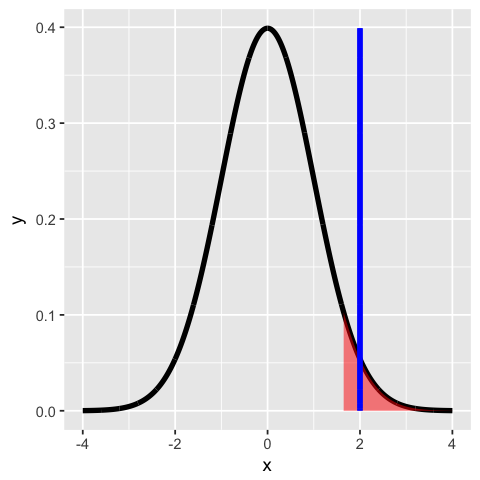

In [4]:
x <- seq(-4,4, length = 2000)
dat <- data.frame(x=x, y=dnorm(x))
library(ggplot2)
g <- ggplot(dat, aes(x = x, y = y)) + geom_line(size = 1.5)+scale_y_continuous(limits=c(0,max(dat$y)))
suppressWarnings(g <- g+ layer("area", stat="identity", position="identity",mapping = aes(x=ifelse(x>qnorm(.95),x,NA)),
            params=list(fill="red",alpha=.5, na.rm=TRUE))) 
suppressWarnings(g <- g + geom_line(aes(x=2.0),size=1.5,colour="blue"))
suppressWarnings(print(g))

Ta bác bỏ $ H_0$ bởi vì dữ liệu của chúng ta thiên về $ H_a$ nhiều hơn. Giá trị kiểm định bằng 2 (đường kẻ dọc màu xanh) rơi vào vùng tô đậm cho thấy giá trị này vượt qua mốc phân vị cho phép. Như ta đã biết, phần tô đậm này thể hiện 5% diện tích nằm dưới đường cong.

Bây giờ, ta thử với phân vị 99 để xem ta có bác bỏ $ H_0$ hay không.


In [5]:
qnorm(.99)

[1] 2.326348

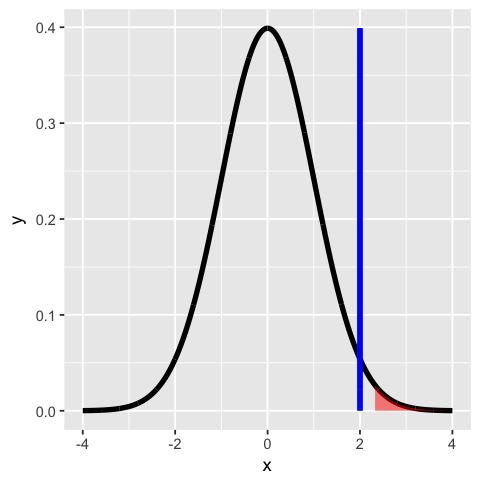

In [6]:
x <- seq(-4,4, length = 2000)
dat <- data.frame(x=x, y=dnorm(x))
g <- ggplot(dat, aes(x = x, y = y)) + geom_line(size = 1.5)+scale_y_continuous(limits=c(0,max(dat$y)))
suppressWarnings(g <- g+ layer("area", stat="identity", position="identity", mapping = aes(x=ifelse(x>qnorm(.99),x,NA)),
            params=list(fill="red",alpha=.5, na.rm=TRUE))) 
suppressWarnings(g <- g + geom_line(aes(x=2.0),size=1.5,colour="blue"))
suppressWarnings(print(g))

Nếu $ \alpha = 0.01$, ta sẽ không bác bỏ $ H_0$.


Một bức ảnh giá trị hơn cả ngàn từ phải không nào? Đường kẻ dọc tại giá trị kiểm định là 2 không nằm trong vùng bác bỏ.

Như vậy, dữ liệu quan sát của chúng ta cho biết mức ý nghĩa đạt được là bao nhiêu. Ta dùng hàm pnorm() của R để lấy được giá trị này. Với các giá trị mặc định, cụ thể là lower.tail=TRUE, hàm này trả về xác suất dữ liệu ngẫu nhiên sinh ra từ phân phối chuẩn nhỏ hơn hay bằng đối số truyền vào. Ta thử với giá trị kiểm định là 2 (mật độ xác suất tính đến 2), các giá trị khác để mặc định.


In [7]:
pnorm(2)

[1] 0.9772499

Như chúng ta nghĩ, giá trị nằm trong khoảng 0.95 (điểm ta bác bỏ) và 0.99 (điểm ta không thể bác bỏ - failed to reject). Điều này cho ta một sự đảm bảo.

Bây giờ, ta hãy tìm trị số p cho ví dụ này. Như trước đó, ta sẽ dùng hàm pnorm(). Nhưng lần này, ta sẽ đạt giá trị lower.tail=FALSE. Điều này cho ta xác suất các giá trị của X vượt mức giá trị kiểm định. Nghĩa là, diện tích nằm phía dưới đường cong bên phải.


In [8]:
pnorm(2,lower.tail=FALSE)

[1] 0.02275013

Kết quả trên cho ta biết mức ý nghĩa đạt được là khoảng 2%.

Khi báo cáo về trị số p, thay vì cung cấp trị số $ \alpha$ và cho biết bạn bác bỏ hay không $ H_0$, người duyệt báo cáo của bạn có thể chọn bất kì trị số alpha nào để kiểm định giả thuyết. Về mặt tổng quát, nếu trị số p nhỏ hơn một giá trị alpha ta bác bỏ giả thuyết (null hypothesis) và nếu nó lớn hơn ta chấp nhận giả thuyết này.
<h2>Kiểm định hai phía</h2>

Đối với kiểm định hai phía, ta phải gấp đôi trị số p cho hai phía. Ta sẽ thấy ở ví dụ tiếp theo. Hầu hết các phần mềm giả sử kiểm định hai phía và tự động gấp đôi trị số p.

Ví dụ, một gia đình có 8 người con, 7 trong số đó là con gái. Ta muốn kiểm định $ H_0, p=0.5$, ở đây $p$ là xác suất con gái (giống ví dụ tung đồng xu). $ H_a, p \ne 0.5$, nghĩa là lớn hơn hay nhỏ hơn 0.5.

Đây là kiểm định hai phía. Đầu tiên ta tìm xác suất có ít nhất $ i$ con gái, với $ i$ chạy từ 0 đến 8. Ta có vector chứa các xác suất này.


In [9]:
quants <- c(-1:7)
mybin <- pbinom(quants,size=8,p=.5,lower.tail=FALSE)
mybin

[1] 1.00000000 0.99609375 0.96484375 0.85546875 0.63671875 0.36328125 0.14453125
[8] 0.03515625 0.00390625

Giá trị kế cuối cho ta biết xác suất để có ít nhất 7 người con gái (trên tổng số 8 người con) là 0.035, giả sử không phân biệt giới tính ($p=0.5$). Ta có thể kiểm định bằng hàm pbinom của R, với đối số là 6, size=8, prob=0.5, và lower.tail=FALSE. Hàm này trả ra xác suất $X > 6$ là bao nhiêu.

In [10]:
pbinom(6,size=8,prob=.5,lower.tail=FALSE)

[1] 0.03515625

Ta có xác suất khoảng 0.03, như vậy ta sẽ bác bỏ $ H_0$ nếu ta chọn $ \alpha=0.05$. Nếu chọn $ \alpha=0.04$ ta vẫn bác bỏ $ H_0$. Tuy nhiên, nếu chọn $ \alpha=0.03$ ta không thể bác bỏ được $ H_0$ (fail to reject) vì trị số p nằm trong khoảng 0.035 lớn hơn hay bằng $ \alpha=0.3$.

Phía còn lại của kiểm định, ta muốn xác suất $X \le 7$. Một lần nữa, ta dùng hàm pbinom để tính với đối số là 7, lower.tail=TRUE.


In [11]:
pbinom(7,size=8,prob=.5,lower.tail=TRUE)

[1] 0.9960938

Như vậy xác suất rất cao (0.996) ta có 7 người con gái trên tổng số là 8 người con. Trị số của kiểm định hai phía bằng 2*(giá trị nhỏ hơn) trong hai kết quả vừa tìm được. Trong trường hợp này ta có $2*0.35=0.7$ là trị số 7 cho phép kiểm định hai phía trên.

<h2>Kiểm định với phân bố Poisson</h2>

Ví dụ sau cùng là sử dụng phân bố Poisson. Phân phối Poisson là một phân phối xác suất rời rạc. Nó khác với các phân phối xác suất rời rạc khác ở chỗ thông tin cho biết không phải là xác suất để một sự kiện (event) xảy ra (thành công) trong một lần thử như trong phân phối Bernoulli, hay là số lần mà sự kiện đó xảy ra trong n lần thử như trong phân phối nhị thức, mà chính là trung bình số lần xảy ra thành công của một sự kiện trong một khoảng thời gian nhất định. Giá trị trung bình này được gọi là $ \lambda$. Ví dụ sau liên quan đến tỉ lệ nhiễm khuẩn trong bệnh viện.

Giả sử bệnh viện có tỉ lệ nhiễm khuẩn là 10 trường hợp trên 100 bệnh nhân trong một ngày. Tỉ lệ này là 0.1. Giả sử tỉ lệ nhiễm khuẩn cho phép (benchmark) là 0.05. Đây là mức ý nghĩa $ \alpha$ của chúng ta.  Với mô hình này, tỉ lệ quan sát được (0.1) có lớn hơn tiêu chuẩn 0.05 hay không?

Nói cách khác, $ H_0$ cho rằng $ \lambda=0.05$ nên $ \lambda_0*100=5$, và $ H_a$ cho rằng $ \lambda > 0.05$. Như vậy ta nên chấp nhận hay bác bỏ $ H_0$ khi mà tỉ lệ quan sát được là 0.1. Như thường lệ, R cung cấp một hàm hữu ích là ppois(), hàm này trả về xác suất của phân phối Poisson. Ta muốn biết xác suất của việc phát hiện ít nhất 9 trường hợp nhiễm khuẩn bằng cách sử dụng $ \lambda = 5$ và lower.tail=FALSE.


In [12]:
ppois(9,5,lower.tail=FALSE)

[1] 0.03182806

Ta thấy xác suất đạt khoảng 0.03. Như vậy ta cần bác bỏ $ H_0$ vì xác suất 0.03 nhỏ hơn mức tiêu chuẩn (benchmark) là 0.05.

Xin chúc mừng, ta đã hoàn tất bài học này. Hy vọng ta đã hiểu được ý nghĩa đằng sau trị số p.

<strong>Nguồn tham khảo:</strong>
<a href="http://swirlstats.com/" target="_blank" rel="noopener">http://swirlstats.com/</a>
<a href="http://ykhoa.net/binhluan/nguyenvantuan/tri%20so%20P%20trong%20khoa%20hoc.pdf" target="_blank" rel="noopener">http://ykhoa.net/binhluan/nguyenvantuan/tri%20so%20P%20trong%20khoa%20hoc.pdf</a>